# POKEMON PREDICTION 

## TO PREDICT IF POKEMON IS LEGENDARY OR NOT 

# IMPORTING LIBRARIES AND DATA EXPLORATION

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv('pokemon (1).csv')

In [85]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [86]:
df.shape

(801, 41)

In [87]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [89]:
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


## VISUALIZING THE NULL VALUES 

In [90]:
import seaborn as sns

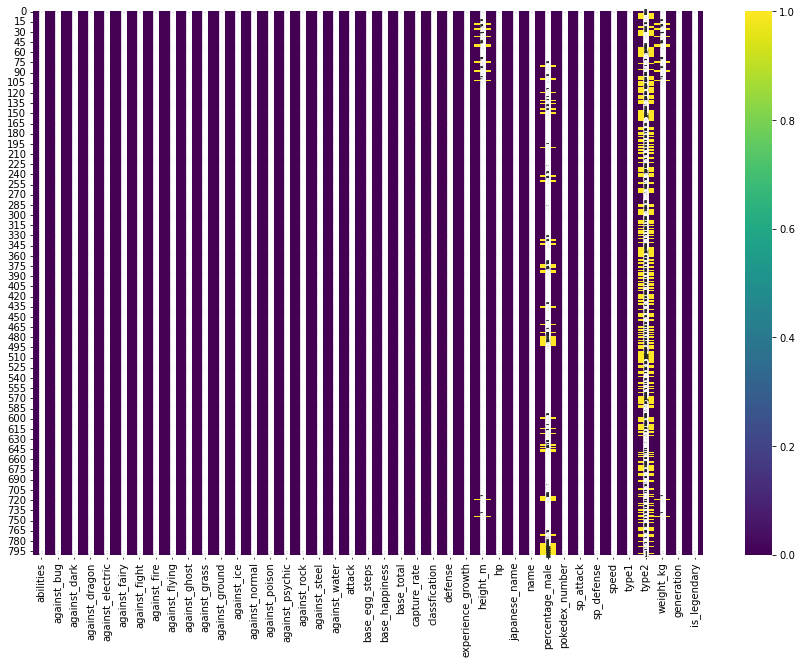

In [91]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap='viridis',annot = True)
plt.show()

In [92]:
import missingno as msno

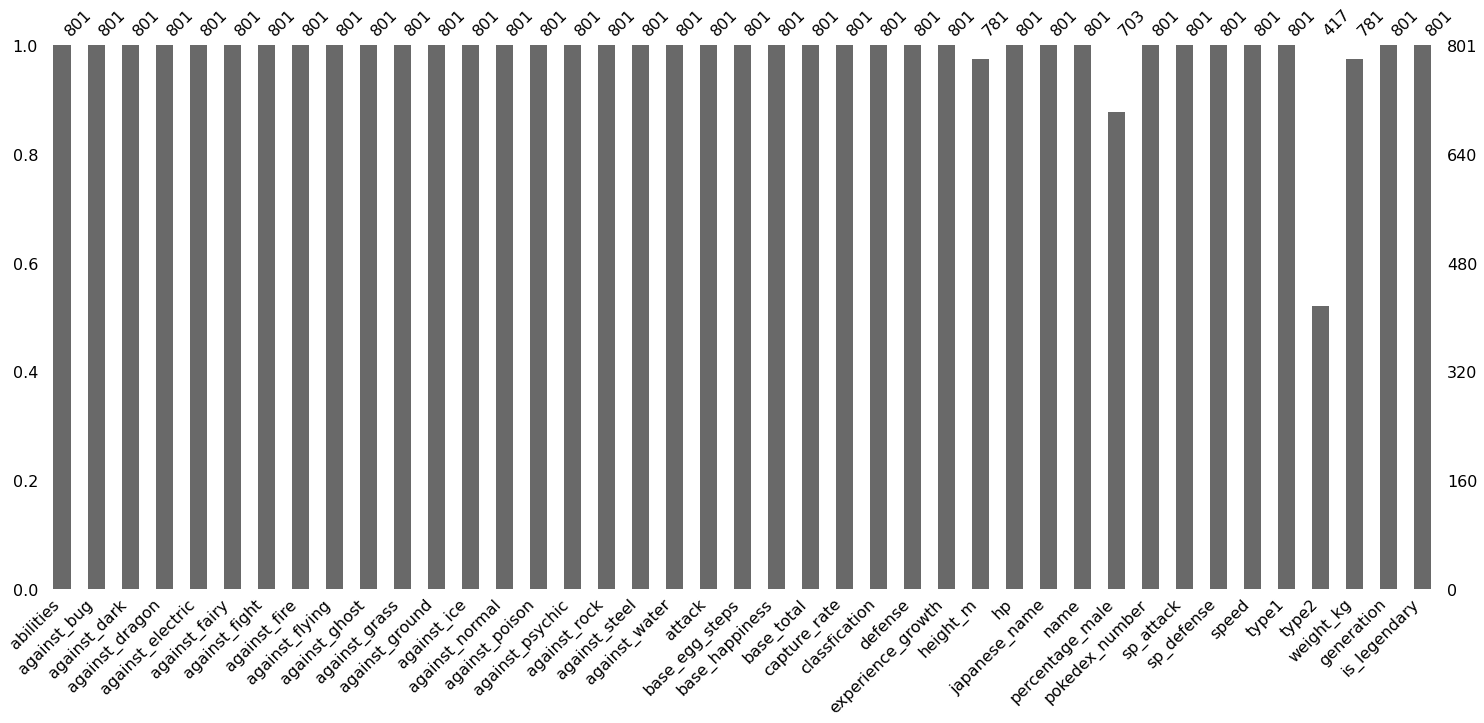

In [93]:
msno.bar(df)
plt.show()

<AxesSubplot:>

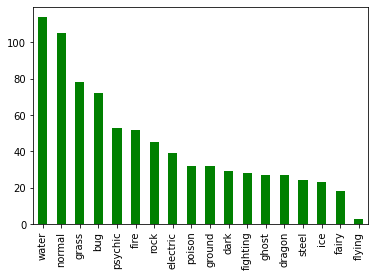

In [94]:
df.type1.value_counts().plot.bar(color='green')

<AxesSubplot:>

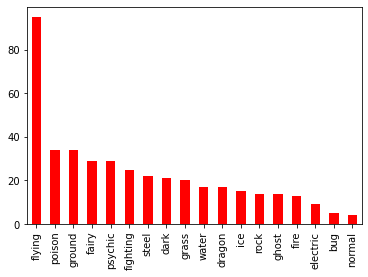

In [95]:
df.type2.value_counts().plot.bar(color='red')

##  HANDLING THE NULL VALUES 

In [96]:
height = df['height_m'].mean()

In [97]:
height

1.163892445582586

In [98]:
df['height_m'] = df['height_m'].fillna(height)

In [99]:
df['type2'] = df['type2'].fillna('none')

In [100]:
weight = df['weight_kg'].mean()
weight

61.37810499359791

In [101]:
df['weight_kg'] = df['weight_kg'].fillna(weight)

In [102]:
df['percentage_male'] = df['percentage_male'].fillna('genderless')

In [103]:
df.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

<AxesSubplot:>

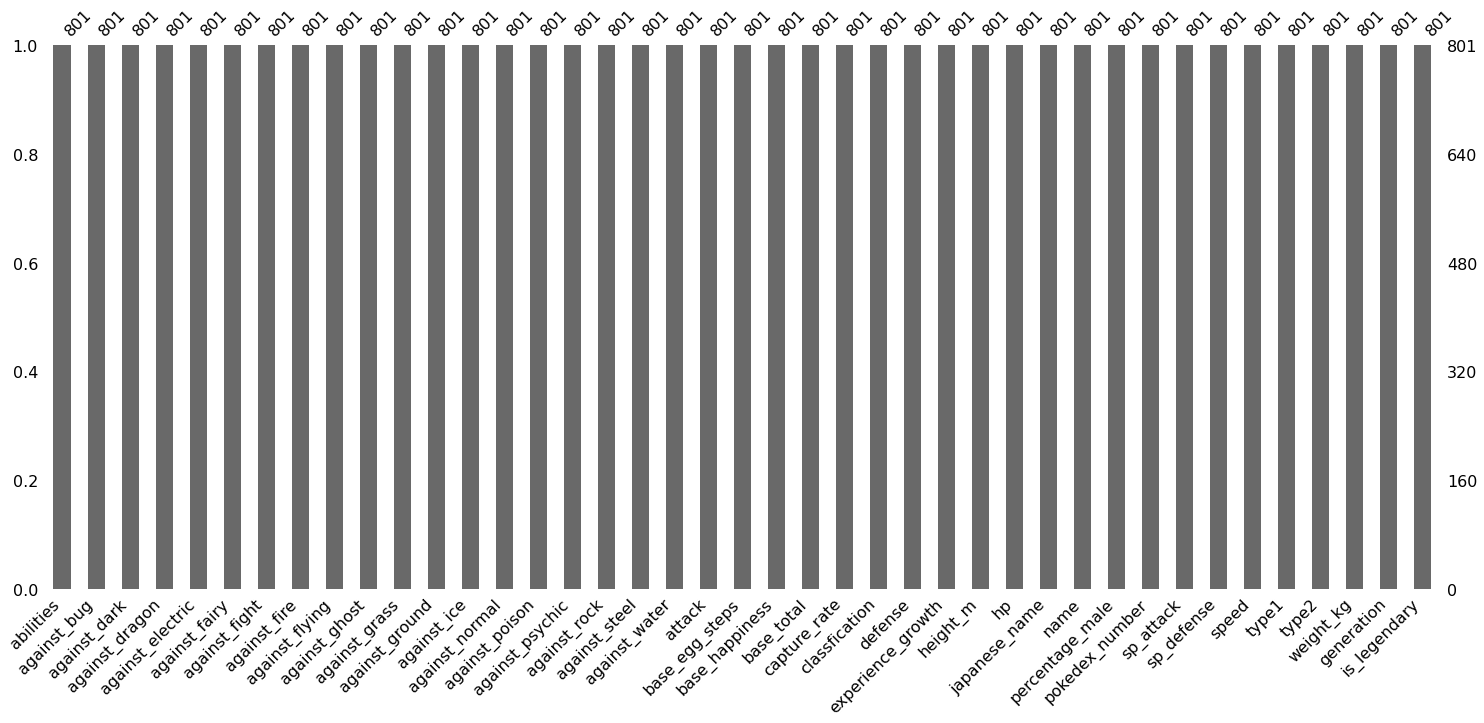

In [104]:
msno.bar(df)

In [105]:
df['type2'].head(30)

0       poison
1       poison
2       poison
3         none
4         none
5       flying
6         none
7         none
8         none
9         none
10        none
11      flying
12      poison
13      poison
14      poison
15      flying
16      flying
17      flying
18        dark
19        dark
20      flying
21      flying
22        none
23        none
24        none
25    electric
26         ice
27         ice
28        none
29        none
Name: type2, dtype: object

In [106]:
pd.crosstab(index=df.generation,columns='number of generation')

col_0,number of generation
generation,
1,151
2,100
3,135
4,107
5,156
6,72
7,80


<AxesSubplot:xlabel='generation'>

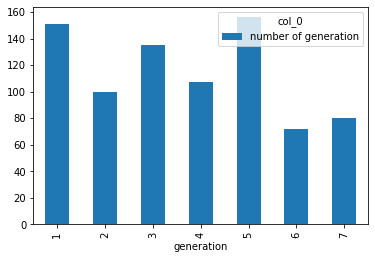

In [107]:
pd.crosstab(index=df.generation,columns='number of generation').plot(kind='bar')

In [108]:
df.drop('japanese_name',axis=1,inplace = True)

In [109]:
df1 = df

In [110]:
df1.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,none,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,none,19.0,1,0


In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

<AxesSubplot:xlabel='is_legendary'>

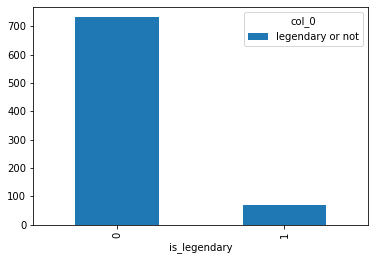

In [114]:
pd.crosstab(df1['is_legendary'],columns = 'legendary or not').plot(kind='bar')

In [115]:
from sklearn.preprocessing import LabelEncoder

In [117]:
le = LabelEncoder()
df1['type1'] = le.fit_transform(df1['type1'])

In [118]:
df1['type1'].unique()

array([ 9,  6, 17,  0, 12, 13,  3, 10,  4,  5, 14, 15,  8, 11,  2,  1, 16,
        7])

In [119]:
df1['type2'].unique()

array(['poison', 'none', 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

In [120]:
df1['type2'] = le.fit_transform(df1['type2'])

In [121]:
df1['type2'].unique()

array([14, 12,  7,  1,  3, 11, 10,  4,  9,  5, 15, 17,  6, 16, 18,  2,  8,
        0, 13])

In [128]:
df1.drop(['abilities','classfication','name','generation'],axis=1,inplace = True)

In [129]:
df2 = df1

In [132]:
df2.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,88.1,1,65,65,45,9,14,6.9,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,88.1,2,80,80,60,9,14,13.0,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,88.1,3,122,120,80,9,14,100.0,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,88.1,4,60,50,65,6,12,8.5,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,88.1,5,80,65,80,6,12,19.0,0


In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [134]:
df2.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,401.000000,71.305868,70.911361,66.334582,9.551810,10.409488,61.378105,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.066737,26.576015,231.373075,32.353826,27.942501,28.907662,5.542348,3.861620,107.979179,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,1.000000,10.000000,20.000000,5.000000,0.000000,0.000000,0.100000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,201.000000,45.000000,50.000000,45.000000,5.000000,7.000000,9.300000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,401.000000,65.000000,66.000000,65.000000,10.000000,12.000000,28.500000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,601.000000,91.000000,90.000000,85.000000,14.000000,12.000000,61.500000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,801.000000,194.000000,230.000000,180.000000,17.000000,18.000000,999.900000,1.000000


In [136]:
df2.drop(['base_egg_steps','base_egg_steps','capture_rate','experience_growth','height_m','percentage_male','pokedex_number','speed'],axis=1,inplace = True)

In [137]:
df3 = df2

In [138]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   against_bug       801 non-null    float64
 1   against_dark      801 non-null    float64
 2   against_dragon    801 non-null    float64
 3   against_electric  801 non-null    float64
 4   against_fairy     801 non-null    float64
 5   against_fight     801 non-null    float64
 6   against_fire      801 non-null    float64
 7   against_flying    801 non-null    float64
 8   against_ghost     801 non-null    float64
 9   against_grass     801 non-null    float64
 10  against_ground    801 non-null    float64
 11  against_ice       801 non-null    float64
 12  against_normal    801 non-null    float64
 13  against_poison    801 non-null    float64
 14  against_psychic   801 non-null    float64
 15  against_rock      801 non-null    float64
 16  against_steel     801 non-null    float64
 1

## IMPORTING RANDOM FOREST CLASSIFIER TO CLASSIFY AS LEGENDARY OR NOT 

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X = df3.drop('is_legendary',axis = 1)

In [142]:
y = df3.is_legendary

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [144]:
len(X_train)

560

In [146]:
len(X_test)

241

In [147]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [148]:
model.score(X_train,y_train)

1.0

In [149]:
model.score(X_test,y_test)

0.950207468879668

In [151]:
from sklearn.metrics import confusion_matrix

In [166]:
y_predict = model.predict(X_test)

## VISUALIZING THE PREDICTION 

In [167]:
cm = confusion_matrix(y_test,y_predict)

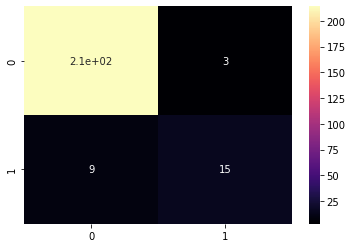

In [168]:
sns.heatmap(cm,cmap = 'magma',annot = True)
plt.show()